# 0. Overview
This notebook ...  
   *//TO-DO*

# 1. Import data

In [8]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

images=[]
path = 'GTSRB\Final_Training\Images'
for filename in tqdm(glob.glob(os.path.join(path, '*\*.ppm'))):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 39209/39209 [05:28<00:00, 119.31it/s]


In [12]:
import numpy as np

images = np.asarray(images)
images.shape

(39209,)

In [13]:
labels = []
for filename in tqdm(glob.glob(os.path.join(path, '*\*.csv'))):
    labels.append(np.genfromtxt(filename, delimiter=';',skip_header=1))

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 52.20it/s]


In [14]:
labels = np.vstack(labels)
labels.shape

(39209, 8)

# 2. Combine data

In [15]:
all_data = np.column_stack((images,labels))

In [16]:
import pandas as pd

df = pd.DataFrame(data=all_data)
df = df.drop(columns=1)
df = df.rename(columns={0: "image", 2: "width", 3: "height", 4: "X1", 5: "Y1", 6: "X2", 7: "Y2", 8: "class"})
df

,image,width,height,X1,Y1,X2,Y2,class
0,"[[[75, 78, 80], [74, 76, 78], [86, 87, 84], [1...",29,30,5,6,24,25,0
1,"[[[69, 73, 73], [76, 79, 79], [75, 77, 77], [7...",30,30,5,5,25,25,0
2,"[[[72, 72, 72], [79, 79, 79], [78, 78, 73], [1...",30,30,5,5,25,25,0
3,"[[[68, 67, 67], [76, 72, 73], [90, 82, 82], [1...",31,31,5,5,26,26,0
4,"[[[73, 73, 75], [74, 73, 75], [75, 72, 69], [1...",30,32,5,6,25,26,0
...,...,...,...,...,...,...,...,...
39204,"[[[13, 11, 12], [11, 11, 12], [11, 12, 13], [1...",52,56,5,6,47,51,42
39205,"[[[11, 9, 10], [10, 9, 11], [9, 9, 11], [9, 9,...",56,58,5,5,51,53,42
39206,"[[[10, 10, 12], [12, 12, 14], [12, 13, 14], [1...",58,62,5,6,53,57,42
39207,"[[[14, 13, 15], [13, 13, 15], [13, 13, 15], [1...",63,69,5,7,58,63,42


In [17]:
df_stop = df[df['class'] == 14]
df_stop = df_stop.reset_index(drop=True)
df_stop.shape

(780, 8)

# 3. Visualize data

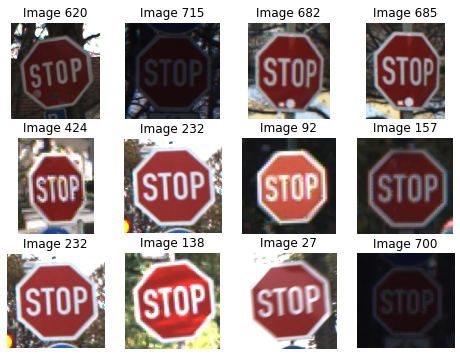

In [18]:
# Show a grid of MxN randomly selected samples from the training data

grid_m = 3
grid_n = 4
rand_grid = np.random.randint(df_stop.shape[0], size=[grid_m,grid_n])

f0, cell0 = plt.subplots(grid_m, grid_n, figsize=(8,6))
for i in range(grid_m):
    for j in range(grid_n):
        cell0[i, j].imshow(df_stop['image'][rand_grid[i,j]])
        cell0[i, j].axis('off')
        cell0[i, j].set_title('Image {}'.format(rand_grid[i,j]))

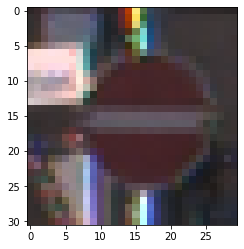

In [20]:
plt.imshow(df[df['class']==17].iloc[100,0])

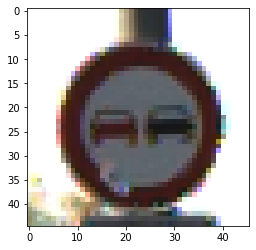

In [22]:
plt.imshow(df[df['class']==9].iloc[50,0])

# we can add a fake class (=14) and a real class for later evaluation :)

In [23]:
df_stop

,image,width,height,X1,Y1,X2,Y2,class
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",48,45,6,5,43,40,14
1,"[[[245, 243, 249], [208, 207, 225], [255, 255,...",48,46,6,6,43,41,14
2,"[[[237, 239, 251], [254, 255, 255], [255, 255,...",49,46,5,6,44,41,14
3,"[[[191, 210, 210], [234, 238, 255], [255, 244,...",51,49,5,6,46,44,14
4,"[[[172, 180, 167], [213, 204, 190], [255, 229,...",50,48,5,5,45,43,14
...,...,...,...,...,...,...,...,...
775,"[[[64, 61, 57], [70, 66, 62], [74, 69, 64], [7...",60,61,6,5,55,56,14
776,"[[[53, 54, 53], [57, 54, 52], [66, 58, 55], [6...",63,66,5,6,57,60,14
777,"[[[65, 62, 55], [63, 61, 53], [67, 65, 58], [7...",69,71,6,7,62,65,14
778,"[[[40, 38, 36], [38, 37, 34], [35, 34, 31], [3...",73,76,6,6,67,69,14


In [24]:
df_stop['image']

0      [[[255, 255, 255], [255, 255, 255], [255, 255,...
1      [[[245, 243, 249], [208, 207, 225], [255, 255,...
2      [[[237, 239, 251], [254, 255, 255], [255, 255,...
3      [[[191, 210, 210], [234, 238, 255], [255, 244,...
4      [[[172, 180, 167], [213, 204, 190], [255, 229,...
                             ...                        
775    [[[64, 61, 57], [70, 66, 62], [74, 69, 64], [7...
776    [[[53, 54, 53], [57, 54, 52], [66, 58, 55], [6...
777    [[[65, 62, 55], [63, 61, 53], [67, 65, 58], [7...
778    [[[40, 38, 36], [38, 37, 34], [35, 34, 31], [3...
779    [[[60, 49, 45], [42, 39, 35], [27, 32, 27], [1...
Name: image, Length: 780, dtype: object

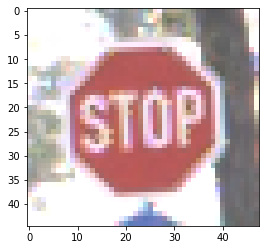

In [25]:
plt.imshow(df_stop['image'][0])

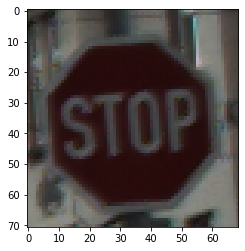

In [26]:
plt.imshow(df_stop['image'][777])

In [27]:
df_stop.append(df[df['class']==9].head(50))

,image,width,height,X1,Y1,X2,Y2,class
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",48,45,6,5,43,40,14
1,"[[[245, 243, 249], [208, 207, 225], [255, 255,...",48,46,6,6,43,41,14
2,"[[[237, 239, 251], [254, 255, 255], [255, 255,...",49,46,5,6,44,41,14
3,"[[[191, 210, 210], [234, 238, 255], [255, 244,...",51,49,5,6,46,44,14
4,"[[[172, 180, 167], [213, 204, 190], [255, 229,...",50,48,5,5,45,43,14
...,...,...,...,...,...,...,...,...
13245,"[[[243, 237, 206], [241, 232, 216], [255, 243,...",36,38,5,6,31,32,9
13246,"[[[255, 205, 195], [255, 201, 182], [246, 174,...",37,38,5,5,32,33,9
13247,"[[[195, 181, 137], [109, 107, 65], [113, 123, ...",40,40,6,5,35,34,9
13248,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",42,42,6,5,37,36,9


In [31]:
df_stop

,image,width,height,X1,Y1,X2,Y2,class
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",48,45,6,5,43,40,14
1,"[[[245, 243, 249], [208, 207, 225], [255, 255,...",48,46,6,6,43,41,14
2,"[[[237, 239, 251], [254, 255, 255], [255, 255,...",49,46,5,6,44,41,14
3,"[[[191, 210, 210], [234, 238, 255], [255, 244,...",51,49,5,6,46,44,14
4,"[[[172, 180, 167], [213, 204, 190], [255, 229,...",50,48,5,5,45,43,14
...,...,...,...,...,...,...,...,...
775,"[[[64, 61, 57], [70, 66, 62], [74, 69, 64], [7...",60,61,6,5,55,56,14
776,"[[[53, 54, 53], [57, 54, 52], [66, 58, 55], [6...",63,66,5,6,57,60,14
777,"[[[65, 62, 55], [63, 61, 53], [67, 65, 58], [7...",69,71,6,7,62,65,14
778,"[[[40, 38, 36], [38, 37, 34], [35, 34, 31], [3...",73,76,6,6,67,69,14


In [32]:
df_final_dataset = df_stop.append(df[df['class']==9].head(100))

In [33]:
df_final_dataset = df_final_dataset.append(df[df['class']==17].head(100))

In [34]:
df_final_dataset

,image,width,height,X1,Y1,X2,Y2,class
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",48,45,6,5,43,40,14
1,"[[[245, 243, 249], [208, 207, 225], [255, 255,...",48,46,6,6,43,41,14
2,"[[[237, 239, 251], [254, 255, 255], [255, 255,...",49,46,5,6,44,41,14
3,"[[[191, 210, 210], [234, 238, 255], [255, 244,...",51,49,5,6,46,44,14
4,"[[[172, 180, 167], [213, 204, 190], [255, 229,...",50,48,5,5,45,43,14
...,...,...,...,...,...,...,...,...
24185,"[[[60, 61, 73], [60, 60, 76], [56, 54, 66], [4...",29,30,6,6,24,25,17
24186,"[[[59, 64, 73], [52, 52, 63], [55, 50, 60], [5...",28,30,5,6,23,25,17
24187,"[[[89, 93, 107], [93, 95, 109], [92, 92, 104],...",29,30,6,6,24,25,17
24188,"[[[56, 54, 65], [58, 55, 66], [59, 54, 64], [5...",29,30,6,6,24,25,17


In [35]:
df_final_dataset['fake_class'] = 14

In [36]:
df_final_dataset

,image,width,height,X1,Y1,X2,Y2,class,fake_class
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",48,45,6,5,43,40,14,14
1,"[[[245, 243, 249], [208, 207, 225], [255, 255,...",48,46,6,6,43,41,14,14
2,"[[[237, 239, 251], [254, 255, 255], [255, 255,...",49,46,5,6,44,41,14,14
3,"[[[191, 210, 210], [234, 238, 255], [255, 244,...",51,49,5,6,46,44,14,14
4,"[[[172, 180, 167], [213, 204, 190], [255, 229,...",50,48,5,5,45,43,14,14
...,...,...,...,...,...,...,...,...,...
24185,"[[[60, 61, 73], [60, 60, 76], [56, 54, 66], [4...",29,30,6,6,24,25,17,14
24186,"[[[59, 64, 73], [52, 52, 63], [55, 50, 60], [5...",28,30,5,6,23,25,17,14
24187,"[[[89, 93, 107], [93, 95, 109], [92, 92, 104],...",29,30,6,6,24,25,17,14
24188,"[[[56, 54, 65], [58, 55, 66], [59, 54, 64], [5...",29,30,6,6,24,25,17,14
